<a href="https://colab.research.google.com/github/luanaoliveira/insta-data-science/blob/main/top_insta_influencers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória do Dados do dataset "Top Instagram Influencers Data"

In [50]:
# Bibliotecas utilizadas

import pandas as pd  # Biblioteca para manipulação e análise de dados
import numpy as np  # Biblioteca para computação numérica
import seaborn as sns  # Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# 1. Coleta dos Dados

In [2]:
# Lê o arquivo CSV do URL e cria um DataFrame
file_id = '1Z-mdHN_Tq5z65ISS2t1Y0Xs3iqEcDXke'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url, sep=',', encoding='utf-8')

# 2. Visualização do Dados

In [3]:
# Visualizando as primeiras 10 linhas do DataFrame

display(df.head(10))

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [4]:
# Verificando o formato do DataFrame (número de linhas e colunas)

print("O DataFrame possui", df.shape[0], "linhas e", df.shape[1], "colunas.")

O DataFrame possui 200 linhas e 10 colunas.


In [5]:
# Obtendo informações sobre os tipos de dados e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

,0
rank,0
channel_info,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,0
new_post_avg_like,0
total_likes,0
country,62


# 3. Descrição dos Dados

## Top Instagram Influencers Data (Dados dos principais influenciadores do Instagram)

O Top Instagram Accounts Dataset é uma coleção de 200 linhas de dados que fornece insights valiosos sobre as contas mais populares do Instagram em diferentes categorias. O conjunto de dados contém várias colunas que fornecem informações abrangentes sobre o desempenho de cada conta, taxa de engajamento e tamanho do público.

1. A coluna "rank" lista as contas em ordem de popularidade no Instagram, começando pela conta mais seguida.

2. A coluna "channel_info": fornece uma breve descrição da conta, como o tipo de conteúdo que ela apresenta ou os produtos e serviços que ela oferece.

3. A coluna "influence_score": Pontuação de influência dos usuários. É calculado com base em menções, importância e popularidade

4. A coluna "posts": exibe o número total de posts na conta. Esta coluna ajuda a entender o nível de atividade da conta e a quantidade de conteúdo que ela produziu ao longo do tempo.

5. A coluna "followers": Número de seguidores do usuário

6. A coluna "avg_likes": Média de curtidas em posts do Instagrammer (total de curtidas/total de posts)

7. A coluna "60_day_eng_rate": Taxa de engajamento dos últimos 60 dias do Instagrammer como facção de engajamentos que eles fizeram até agora

8. A coluna "new_post_avg_like": Média de curtidas que eles têm em novos posts

9. A coluna "total_likes": Total de curtidas que o usuário obteve em seus posts. (em bilhões)

10. A coluna "country": País ou região de origem do usuário.

Este projeto tem como objetivo fornecer insights sobre os níveis de engajamento das contas do Instagram.

In [7]:
df["country"].unique()

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [8]:
df.nunique()

,0
rank,200
channel_info,200
influence_score,32
posts,99
followers,165
avg_likes,135
60_day_eng_rate,147
new_post_avg_like,162
total_likes,116
country,25


In [9]:
df.describe(include='all')

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,200.000000,200,200.000000,200,200,200,200,200,200,138
unique,NaN,200,NaN,99,165,135,147,162,116,25
top,NaN,cristiano,NaN,10.0k,46.5m,1.1m,0.02%,0,1.5b,United States
freq,NaN,1,NaN,13,3,13,5,8,9,66
mean,100.500000,NaN,81.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,57.879185,NaN,8.878159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50.750000,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,100.500000,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,150.250000,NaN,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Tratamento dos dados

In [10]:
# Convertendo os campos numéricos de object com sufixo para int

def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('k', 'e3').replace('m', 'e6').replace('b', 'e9')  # Substitui os sufixos por notação científica
        return round(float(value))
    else:
        return value

df['posts'] = df['posts'].apply(convert_to_float)
df['followers'] = df['followers'].apply(convert_to_float)
df['avg_likes'] = df['avg_likes'].apply(convert_to_float)
df['new_post_avg_like'] = df['new_post_avg_like'].apply(convert_to_float)
df['total_likes'] = df['total_likes'].apply(convert_to_float)

display(df.head(3))
df.info()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300,475800000,8700000,1.39%,6500000,29000000000,Spain
1,2,kyliejenner,91,6900,366200000,8300000,1.62%,5900000,57400000000,United States
2,3,leomessi,90,890,357300000,6800000,1.24%,4400000,6000000000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    int64 
 4   followers          200 non-null    int64 
 5   avg_likes          200 non-null    int64 
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    int64 
 8   total_likes        200 non-null    int64 
 9   country            138 non-null    object
dtypes: int64(7), object(3)
memory usage: 15.8+ KB


In [11]:
# Convertendo o campos de object para float (continua sendo porcentagem)

def convert_percentage_to_decimal(value):
    if isinstance(value, str):
        value = value.replace('%', '')
        return float(value)
    else:
        return value

df['60_day_eng_rate'] = df['60_day_eng_rate'].apply(convert_percentage_to_decimal)

df['60_day_eng_rate'].dtype
display(df['60_day_eng_rate'].head(3))
df.info()


,60_day_eng_rate
0,1.39
1,1.62
2,1.24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    int64  
 4   followers          200 non-null    int64  
 5   avg_likes          200 non-null    int64  
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    int64  
 8   total_likes        200 non-null    int64  
 9   country            138 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 15.8+ KB


In [12]:
# Há um valor nulo em 60_day_eng_rate

# Mostrando os valores nulos da coluna '60_day_eng_rate'
if df['60_day_eng_rate'].isnull().any():
    print(df[df['60_day_eng_rate'].isnull()])
else:
    print("Não há valores nulos na coluna '60_day_eng_rate'.")

# Preenchendo valores NaN com 0
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(0)

df.info()

     rank channel_info  influence_score  posts  followers  avg_likes  \
167   168        rkive               83    110   37000000   10900000   

     60_day_eng_rate  new_post_avg_like  total_likes country  
167              NaN                  0   1200000000     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    int64  
 4   followers          200 non-null    int64  
 5   avg_likes          200 non-null    int64  
 6   60_day_eng_rate    200 non-null    float64
 7   new_post_avg_like  200 non-null    int64  
 8   total_likes        200 non-null    int64  
 9   country            138 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory u

In [13]:
# Excluindo o campo "country"
df = df.drop(columns=['country'])



In [14]:
#display(df.head(10))
#df.info()

pd.set_option('display.float_format', '{:,.2f}'.format)
display(df.describe())
# para fins de visualização
dfv = pd.DataFrame()
dfv['influence_score'] = df['influence_score']
dfv['posts_milhares'] = df['posts'] / 1000
dfv['followers_milhoes'] = df['followers'] / 1000000
dfv['avg_likes_milhoes'] = df['avg_likes'] / 1000000
dfv['60_day_eng_rate'] = df['60_day_eng_rate']
dfv['new_post_avg_like_milhoes'] = df['new_post_avg_like'] / 1000000
dfv['total_likes_bilhoes'] = df['total_likes'] / 1000000000



display(dfv.describe())

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,81.82,"3,499.85","77,409,500.00","1,787,103.50",1.89,"1,208,132.50","3,658,112,500.00"
std,57.88,8.88,"3,475.83","73,687,269.79","2,193,359.15",3.32,"1,858,321.85","5,561,938,629.08"
min,1.00,22.00,10.00,"32,800,000.00","65,100.00",0.00,0.00,"18,300,000.00"
25%,50.75,80.00,947.50,"40,000,000.00","504,400.00",0.41,"195,750.00","996,850,000.00"
50%,100.50,84.00,"2,100.00","50,050,000.00","1,100,000.00",0.86,"532,150.00","2,000,000,000.00"
75%,150.25,86.00,"5,025.00","68,900,000.00","2,100,000.00",2.03,"1,325,000.00","3,900,000,000.00"
max,200.00,93.00,"17,500.00","475,800,000.00","15,400,000.00",26.41,"12,600,000.00","57,400,000,000.00"


,influence_score,posts_milhares,followers_milhoes,avg_likes_milhoes,60_day_eng_rate,new_post_avg_like_milhoes,total_likes_bilhoes
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,81.82,3.50,77.41,1.79,1.89,1.21,3.66
std,8.88,3.48,73.69,2.19,3.32,1.86,5.56
min,22.00,0.01,32.80,0.07,0.00,0.00,0.02
25%,80.00,0.95,40.00,0.50,0.41,0.20,1.00
50%,84.00,2.10,50.05,1.10,0.86,0.53,2.00
75%,86.00,5.03,68.90,2.10,2.03,1.32,3.90
max,93.00,17.50,475.80,15.40,26.41,12.60,57.40


### Estatística descritiva

In [16]:
# prompt: faça média, moda, mediana, máximo, mínimo, variância e desvio padrão para cada coluna numérica do dataframe menos a "rank"

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'rank' in numeric_cols:
  numeric_cols.remove('rank')

for col in numeric_cols:
  print(f"\nColuna: {col}")
  print(f"Média: {df[col].mean()}")
  print(f"Moda: {df[col].mode()[0]}")
  print(f"Mediana: {df[col].median()}")
  print(f"Máximo: {df[col].max()}")
  print(f"Mínimo: {df[col].min()}")
  print(f"Variância: {df[col].var()}")
  print(f"Desvio Padrão: {df[col].std()}")


Coluna: influence_score
Média: 81.82
Moda: 85
Mediana: 84.0
Máximo: 93
Mínimo: 22
Variância: 78.8217085427136
Desvio Padrão: 8.878159073969874

Coluna: posts
Média: 3499.85
Moda: 10000
Mediana: 2100.0
Máximo: 17500
Mínimo: 10
Variância: 12081381.384422135
Desvio Padrão: 3475.8281580685393

Coluna: followers
Média: 77409500.0
Moda: 33200000
Mediana: 50050000.0
Máximo: 475800000
Mínimo: 32800000
Variância: 5429813728391944.0
Desvio Padrão: 73687269.78516673

Coluna: avg_likes
Média: 1787103.5
Moda: 1100000
Mediana: 1100000.0
Máximo: 15400000
Mínimo: 65100
Variância: 4810824373706.281
Desvio Padrão: 2193359.1529219016

Coluna: 60_day_eng_rate
Média: 1.8925
Moda: 0.02
Mediana: 0.865
Máximo: 26.41
Mínimo: 0.0
Variância: 11.049403768844227
Desvio Padrão: 3.324064344871234

Coluna: new_post_avg_like
Média: 1208132.5
Moda: 0
Mediana: 532150.0
Máximo: 12600000
Mínimo: 0
Variância: 3453360082003.769
Desvio Padrão: 1858321.8456456268

Coluna: total_likes
Média: 3658112500.0
Moda: 1500000000
Medi

In [17]:
df.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,81.82,"3,499.85","77,409,500.00","1,787,103.50",1.89,"1,208,132.50","3,658,112,500.00"
std,57.88,8.88,"3,475.83","73,687,269.79","2,193,359.15",3.32,"1,858,321.85","5,561,938,629.08"
min,1.00,22.00,10.00,"32,800,000.00","65,100.00",0.00,0.00,"18,300,000.00"
25%,50.75,80.00,947.50,"40,000,000.00","504,400.00",0.41,"195,750.00","996,850,000.00"
50%,100.50,84.00,"2,100.00","50,050,000.00","1,100,000.00",0.86,"532,150.00","2,000,000,000.00"
75%,150.25,86.00,"5,025.00","68,900,000.00","2,100,000.00",2.03,"1,325,000.00","3,900,000,000.00"
max,200.00,93.00,"17,500.00","475,800,000.00","15,400,000.00",26.41,"12,600,000.00","57,400,000,000.00"


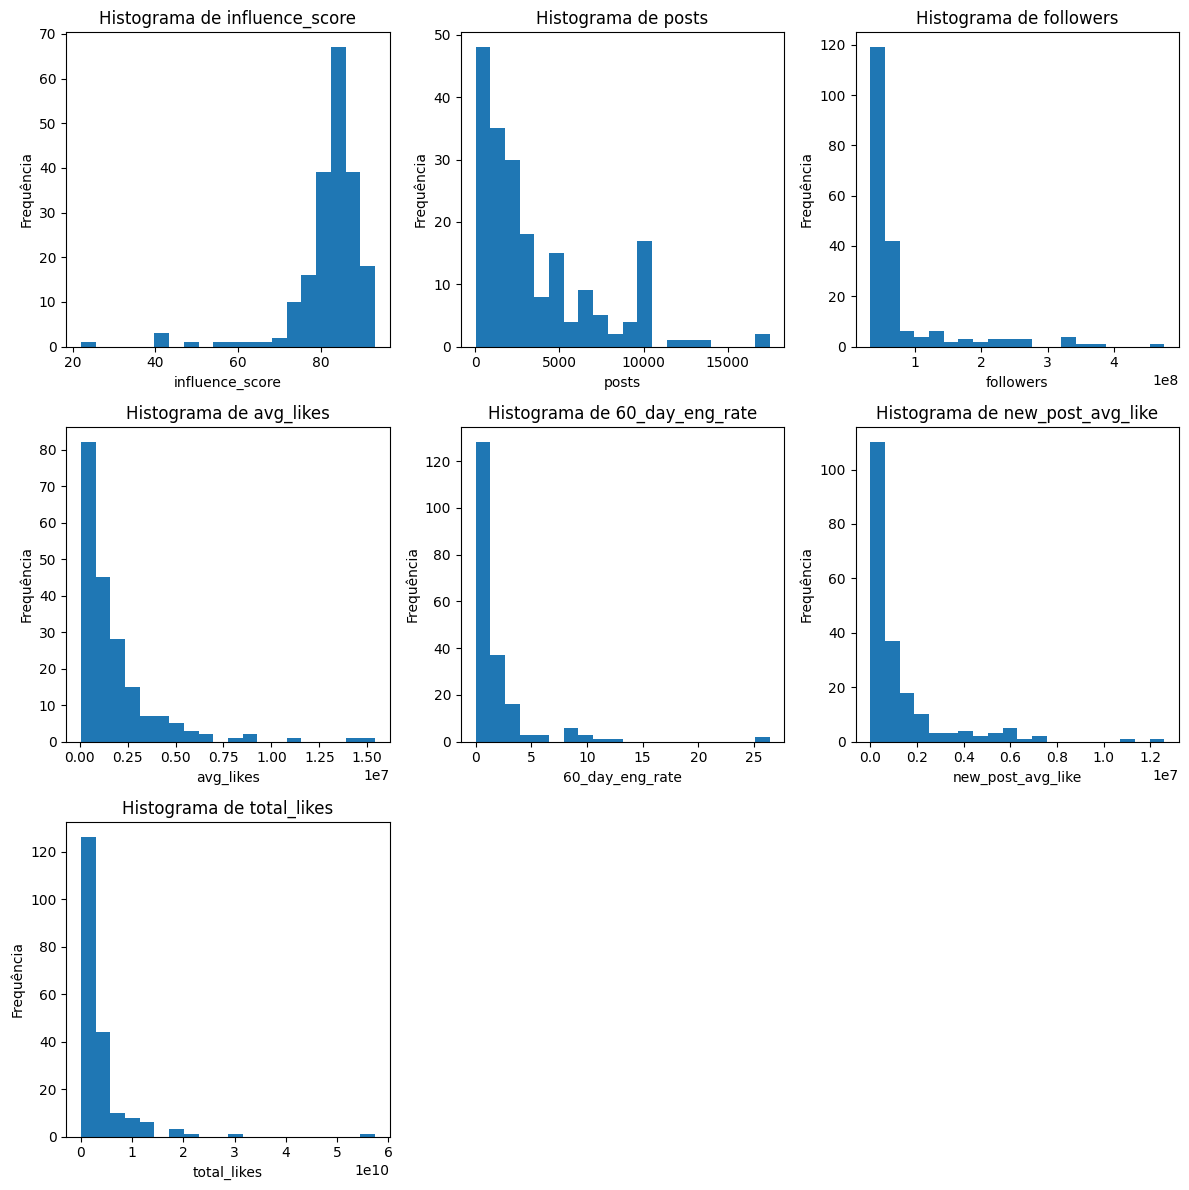

In [18]:
# Selecionar as colunas para gerar os histogramas
columns_to_plot = [col for col in df.columns if col not in ["rank", "channel_info", "country"]]

# Criar uma grade de histogramas
num_cols = 3  # Número de colunas na grade
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Número de linhas na grade

plt.figure(figsize=(12, num_rows * 4))  # Ajustar o tamanho da figura conforme necessário

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(df[column], bins=20)  # Criar o histograma
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()  # Ajustar o layout da grade para evitar sobreposição
plt.savefig('histogramas.png', dpi=300, bbox_inches='tight')
plt.show()

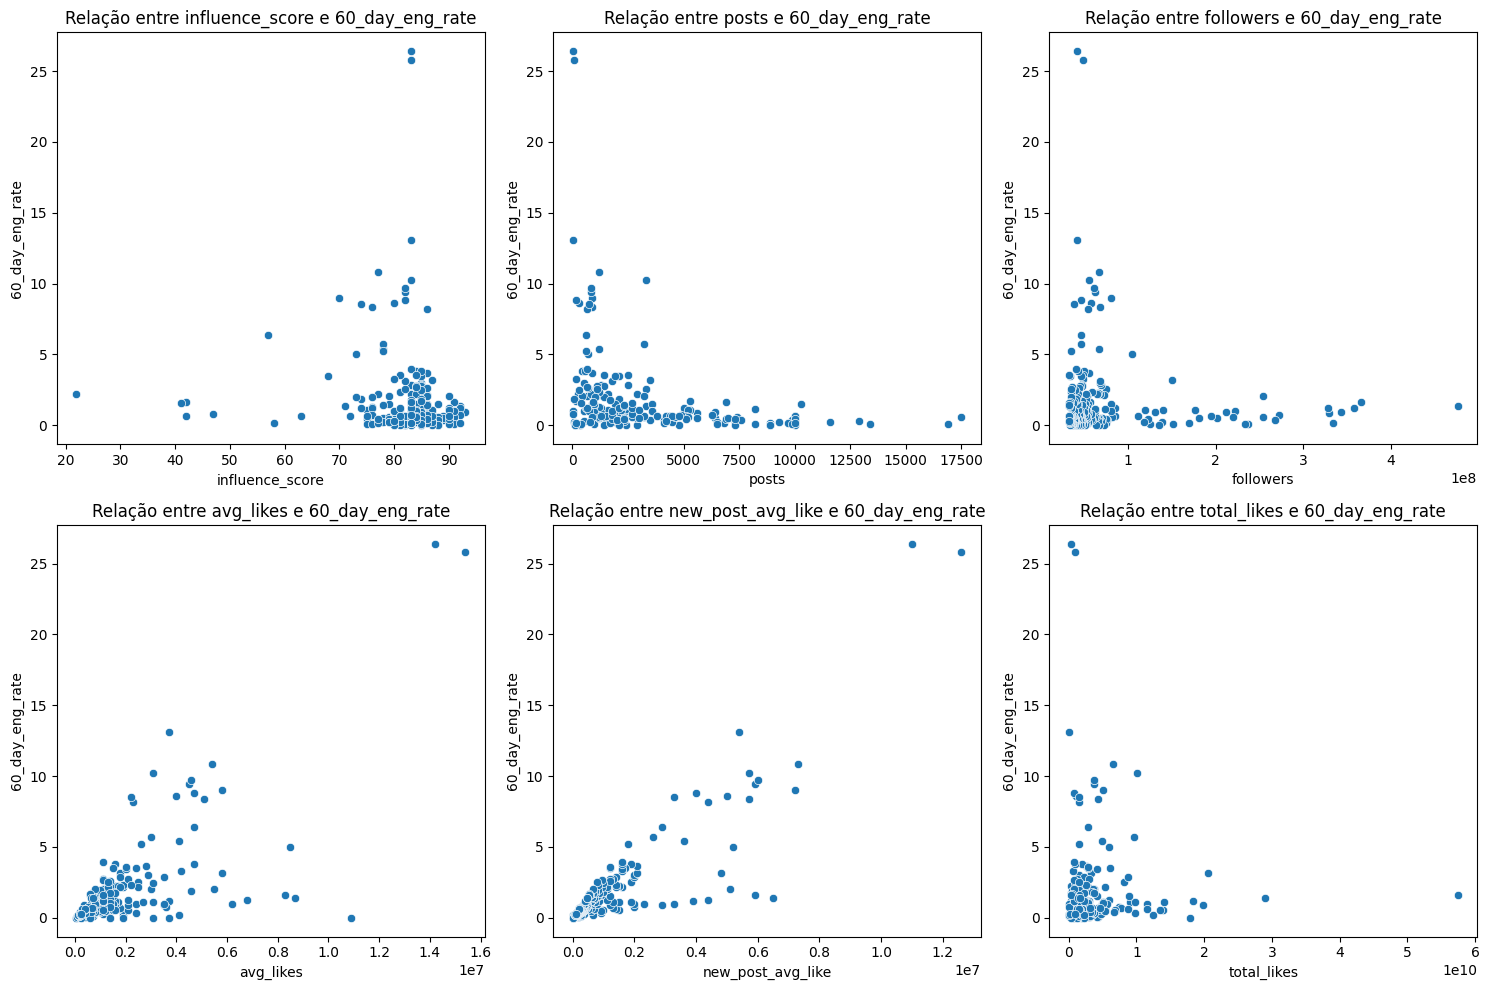

In [28]:
columns_to_plot = ["influence_score", "posts", "followers", "avg_likes", "new_post_avg_like", "total_likes", "60_day_eng_rate"]
df_selected = df[columns_to_plot].dropna()

plt.figure(figsize=(15, 10))
for i, column in enumerate(df_selected.columns[:-1], 1): # Exclui "60_day_eng_rate" da iteração
  plt.subplot(2, 3, i)
  sns.scatterplot(data=df_selected, x=column, y="60_day_eng_rate")
  plt.title(f'Relação entre {column} e 60_day_eng_rate')
  plt.xlabel(column)
  plt.ylabel("60_day_eng_rate")

plt.tight_layout()
plt.savefig('gráficos_de_dispersão.png', dpi=300, bbox_inches='tight')
plt.show()


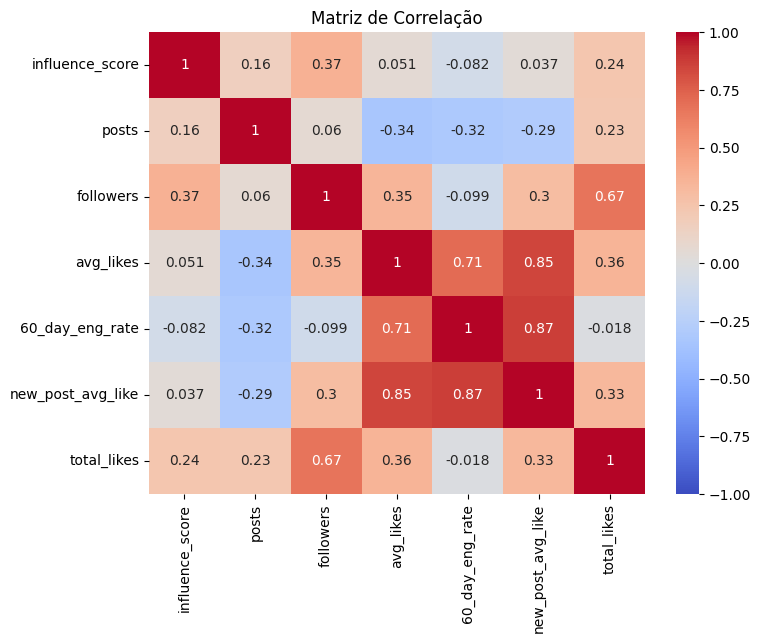

In [20]:
# Selecionar as colunas para calcular a matriz de correlação
columns_to_plot = [col for col in df.columns if col not in ["rank", "channel_info", "country"]]

# Calcular a matriz de correlação para as colunas selecionadas
corr_matrix = df[columns_to_plot].corr()

# Gerar o heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.savefig('matriz_de_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

### Análise das Correlações
**60_day_eng_rate e new_post_avg_like**: A correlação entre essas duas variáveis é de 0.869, o que indica uma correlação positiva forte. Isso significa que, conforme o valor de new_post_avg_like aumenta, o valor de 60_day_eng_rate também tende a aumentar. Essa é uma variável importante e parece ser um bom preditor para 60_day_eng_rate.

**60_day_eng_rate e avg_likes**: A correlação é de 0.708, também indicando uma correlação positiva forte. Assim como new_post_avg_like, essa variável também parece ter um impacto significativo sobre 60_day_eng_rate.

**60_day_eng_rate e post**s: A correlação é de -0.320, o que indica uma correlação negativa moderada. Isso sugere que um aumento no número de posts está associado a uma leve redução no 60_day_eng_rate. Essa variável pode ser um preditor, mas com um impacto menos significativo do que new_post_avg_like e avg_likes.

**60_day_eng_rate e followers**: A correlação é -0.099, o que indica uma correlação muito fraca. Essa variável provavelmente não contribui muito para a previsão de 60_day_eng_rate e pode ser desconsiderada.


 Análise de Outliers

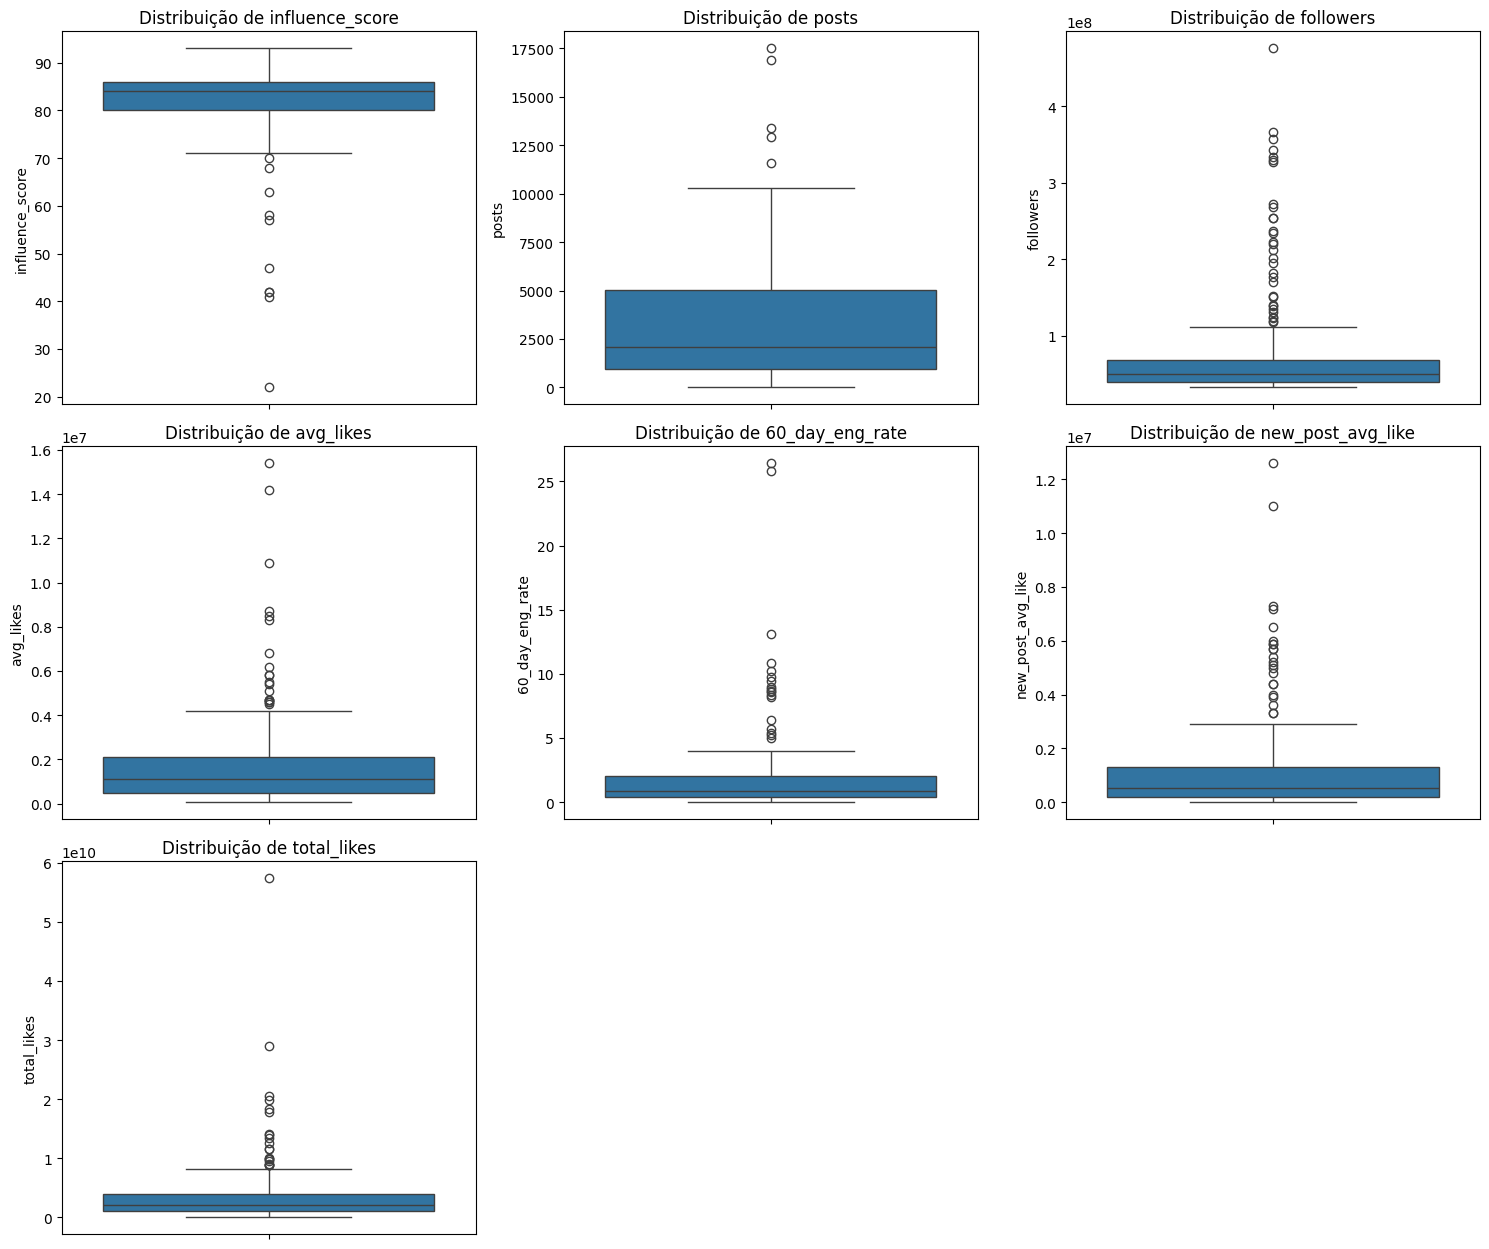

In [22]:
# Configurações de layout
plt.figure(figsize=(15, 25))
for index, column in enumerate(columns_to_plot, 1):  # Usa enumerate para criar um índice numérico
    plt.subplot(6, 3, index)  # Usa index como índice do subplot
    sns.boxplot(y=df[column])
    plt.title(f"Distribuição de {column}")

plt.tight_layout()
plt.savefig('outliers.png', dpi=300, bbox_inches='tight')
plt.show()

Como temos apenas 200 registros e considerando que os dados representam as interações dos seguidores nas redes sociais, os outliers podem conter informações valiosas e refletir variações no comportamento de interação dos usuários. Exemplos disso são posts que se tornam virais ou influenciadores que experimentam picos de engajamento. Portanto, os outliers serão mantidos.

# 5. Aplicação do modelo de Regressão Linear

Preparar os dados

In [29]:
df = df[['rank', 'channel_info', 'posts', 'followers', 'total_likes', 'avg_likes', 'new_post_avg_like', 'influence_score', '60_day_eng_rate']]
df.head(2)

,rank,channel_info,posts,followers,total_likes,avg_likes,new_post_avg_like,influence_score,60_day_eng_rate
0,1,cristiano,3300,475800000,29000000000,8700000,6500000,92,1.39
1,2,kyliejenner,6900,366200000,57400000000,8300000,5900000,91,1.62


In [30]:
X = df.iloc[:, 5:7].values
X

array([[ 8700000,  6500000],
       [ 8300000,  5900000],
       [ 6800000,  4400000],
       [ 6200000,  3300000],
       [ 1900000,   665300],
       [ 3500000,  2900000],
       [ 3700000,  3900000],
       [ 3600000,  2000000],
       [ 2400000,   926900],
       [ 1900000,  1500000],
       [ 5500000,  5100000],
       [  302200,   159300],
       [  329000,   181800],
       [ 2400000,  2300000],
       [ 1700000,  1400000],
       [ 3500000,  2000000],
       [ 2100000,  1000000],
       [ 1800000,  1300000],
       [ 1300000,   913600],
       [ 2700000,  1900000],
       [  715000,   265100],
       [  522000,   115200],
       [ 5800000,  4800000],
       [ 3100000,  1500000],
       [ 1100000,   363400],
       [ 3700000,        0],
       [ 2100000,  1200000],
       [  420500,    81700],
       [  996200,   588300],
       [ 1700000,  1300000],
       [  463200,   255900],
       [ 1200000,   706300],
       [ 8500000,  5200000],
       [ 2100000,  1100000],
       [ 14000

In [31]:
y = df.iloc[:, 8].values
y

array([1.390e+00, 1.620e+00, 1.240e+00, 9.700e-01, 2.000e-01, 8.800e-01,
       1.200e+00, 7.600e-01, 3.500e-01, 5.900e-01, 2.040e+00, 7.000e-02,
       8.000e-02, 1.010e+00, 6.200e-01, 9.600e-01, 5.300e-01, 6.700e-01,
       5.100e-01, 1.090e+00, 1.600e-01, 8.000e-02, 3.170e+00, 1.100e+00,
       2.700e-01, 2.000e-02, 9.200e-01, 7.000e-02, 4.800e-01, 1.100e+00,
       2.200e-01, 6.400e-01, 5.020e+00, 1.260e+00, 6.900e-01, 6.000e-01,
       1.530e+00, 1.000e+00, 9.000e+00, 4.100e-01, 1.700e-01, 2.560e+00,
       4.600e-01, 1.170e+00, 4.000e-02, 2.160e+00, 5.400e-01, 2.800e-01,
       2.870e+00, 8.360e+00, 3.010e+00, 3.140e+00, 2.230e+00, 1.083e+01,
       4.900e-01, 1.000e-02, 5.400e+00, 2.250e+00, 5.100e-01, 3.000e-01,
       2.190e+00, 2.000e-02, 5.800e-01, 6.900e-01, 9.430e+00, 1.120e+00,
       1.010e+00, 1.150e+00, 5.200e-01, 9.720e+00, 4.100e-01, 2.340e+00,
       5.800e-01, 4.400e-01, 7.800e-01, 8.630e+00, 1.620e+00, 3.690e+00,
       1.025e+01, 8.500e-01, 1.530e+00, 2.000e-01, 

Separação entre treino e teste

In [32]:
# Dividir os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X_train.shape, X_test.shape

((160, 2), (40, 2))

Normalização

In [ ]:
# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Treinamento do modelo

In [34]:
#  Inicializar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
model.intercept_

0.05875218910937319

In [36]:
model.coef_

array([-1.31489707e-07,  1.67806974e-06])

In [53]:
test_predictions = model.predict(X_train_scaled)
test_predictions

array([ 1.24441187,  2.95467769,  0.4272642 ,  0.24883606,  0.64938707,
        2.48068436,  9.52231796,  0.09501052,  0.47038751,  2.4149395 ,
        0.91014341,  0.13796847,  0.02507768,  9.2161316 , -0.3488659 ,
        2.73740448,  5.56069545,  0.26856973,  0.26051644,  0.53361566,
        0.33733216,  1.46069354,  1.31980665,  1.66794743,  1.0694045 ,
        2.15821938,  1.75999022,  1.12031004,  1.9277972 ,  2.53328024,
        2.32602635,  1.42090008, -0.19107825,  7.92314205,  0.18986025,
        2.191407  ,  0.6766452 ,  1.00987772,  0.91345997,  1.48521676])

In [38]:
y_test

array([1.520e+00, 9.600e-01, 2.200e-01, 4.300e-01, 9.600e-01, 3.470e+00,
       9.720e+00, 1.000e-01, 8.000e-01, 2.160e+00, 1.010e+00, 1.700e-01,
       2.000e-02, 1.025e+01, 2.000e-02, 5.230e+00, 5.400e+00, 4.600e-01,
       2.500e-01, 5.200e-01, 4.400e-01, 5.300e-01, 2.490e+00, 2.180e+00,
       1.120e+00, 2.190e+00, 2.060e+00, 1.150e+00, 2.760e+00, 3.820e+00,
       5.900e-01, 5.100e-01, 1.000e-02, 8.630e+00, 2.200e-01, 3.280e+00,
       1.050e+00, 1.490e+00, 1.580e+00, 1.620e+00])

In [56]:
real_vs_previsao = pd.DataFrame({'Real': y_test, 'Previsão': test_predictions})
real_vs_previsao.head()

,Real,Previsão
0,1.52,1.24
1,0.96,2.95
2,0.22,0.43
3,0.43,0.25
4,0.96,0.65


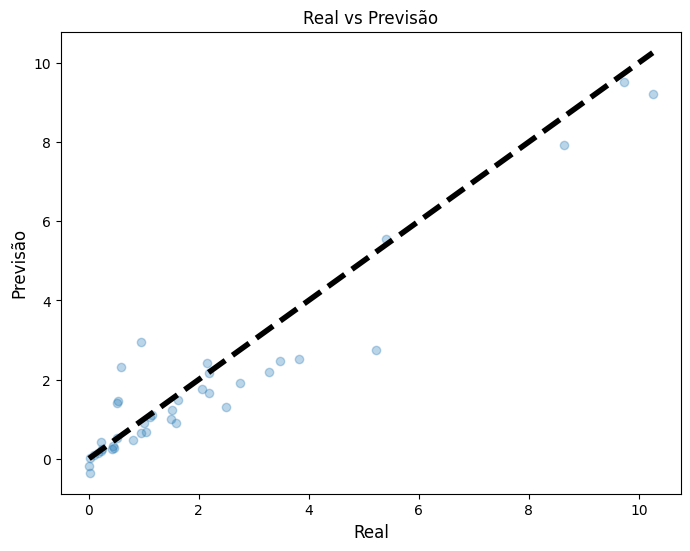

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Real", fontsize = 12)
plt.ylabel("Previsão", fontsize = 12)
plt.title('Real vs Previsão');
plt.savefig('correlacao_rlm.png')

Métricas

In [46]:
print(f"R²: {model.score(X_test, y_test)}") # Coeficiente de determinação (R²)
print(f"MAE: {abs(y_test - test_predictions).mean()}") # Erro Absoluto (MAE)
print(f"MSE: {mean_squared_error(y_test, test_predictions)}") # Erro quadrático Absoluto (MSE)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_predictions))}") # Raiz do erro quadrático médio (RMSE)

R²: 0.9042394863060305
MAE: 0.5182350238540335
MSE: 0.6065762947092477
RMSE: 0.7788300807681016


Validação Cruzada

In [48]:
# Separando os dados em folds
kfold = KFold(n_splits = 2, shuffle=True)
cross_validation = cross_val_score(model, X, y, cv = kfold)
cross_validation

array([0.8106954 , 0.71759416])

In [49]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (cross_validation.mean() * 100.0))

Coeficiente de Determinação Médio: 76.41%
